# Box Office Film Analysis For Microsoft Movie Studio

**Author:** Samuel Kabati
***

## Overview

This project analyzes film analytics in the box office. Exploratory analysis of the data shows the genres associated with an above average rating, as well as also investigating the relatonship between various variables in the dataset. Microsoft can use the analysis to understand what type of movies to start showing as well as the market they could target.

## Business Problem
To start the movie studio, relevant and accurate information on various titles is required. This will in the log run help save on start-up costs for the movie studio by doing what works and avoiding the hit or miss. This is crucial as it could determine whether the movie studio becomes popular and successful or whether it ends up failing. I explore the data to find genres that may be the best to start with and also investigate relationships that might have an impact on ratings.

## Data Understanding

The Box Office has a dataset on various movie titles. Every title has a unique id associated with its genre, start year, run time,original title, average rating and the number of votes ladng up to the rating.

In [1]:
import pandas as pd


### Title Basics Data

In [2]:
title_basics=pd.read_csv('zippedData/imdb.title.basics.csv.gz')

title_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [3]:
title_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


### Title Ratings Data

In [4]:
title_ratings=pd.read_csv('zippedData/imdb.title.ratings.csv.gz')

title_ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [5]:
title_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


### Movie Gross Data

In [6]:
movie_gross=pd.read_csv('zippedData/bom.movie_gross.csv.gz')
movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [7]:
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


## Data preparation

### Data Cleaning
I make the data easier to work with by checking for null values and dealing with the missing data, checking for duplicates and renaming some columns.

#### Title Basics Data Cleaning 

In [8]:
title_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [9]:
#replacing null values
title_basics['original_title'].fillna('Unknown',inplace=True)

title_basics['runtime_minutes'].fillna(title_basics['runtime_minutes'].median(),inplace=True)
title_basics['genres'].fillna('Unknown',inplace=True)

In [10]:
# Checking whether all columns are now filled 
title_basics.isna().sum()

tconst             0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
dtype: int64

In [11]:
#Checking for duplicates
title_basics_duplicates=title_basics[title_basics.duplicated()]
print(len(title_basics_duplicates))
title_basics_duplicates.head()

0


,tconst,primary_title,original_title,start_year,runtime_minutes,genres


#### Title Ratings Data Cleaning 

In [12]:
title_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [13]:
#Checking for null values
title_ratings.isna().sum()

tconst           0
averagerating    0
numvotes         0
dtype: int64

In [14]:
#Checking for duplicates
title_ratings_duplicates=title_ratings[title_ratings.duplicated()]
print(len(title_ratings_duplicates))
title_ratings_duplicates.head()

0


,tconst,averagerating,numvotes


#### Movie Gross Data Cleaning 

In [15]:
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [16]:
# changing foreign gross to a numerical value
movie_gross['foreign_gross'].replace(',','', regex=True, inplace=True)
movie_gross['foreign_gross']=pd.to_numeric(movie_gross['foreign_gross'],errors = 'coerce')
movie_gross['foreign_gross'].dtype

dtype('float64')

In [17]:
#Replacing null values
movie_gross['studio'].fillna('Unknown',inplace=True)

movie_gross['domestic_gross'].fillna(movie_gross['domestic_gross'].median(),inplace=True)

movie_gross['foreign_gross'].fillna(movie_gross['foreign_gross'].median(),inplace=True)

In [18]:
#Checking for null values
movie_gross.isna().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [19]:
# checking for duplicates
movie_gross_duplicates=movie_gross[movie_gross.duplicated()]
print(len(movie_gross_duplicates))
movie_gross_duplicates.head()

0


,title,studio,domestic_gross,foreign_gross,year


### Merging Datasets
I merge the title basics and title ratings dataset using the title unique id `t_const`. 

In [20]:
titles_and_ratings=pd.merge(title_basics,title_ratings, on='tconst',how='left')
titles_and_ratings.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,87.0,"Comedy,Drama",6.1,13.0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0


Merging the datasets yields a single dataset for feature engineering and data analysis.

In [34]:
titles_and_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146144 entries, 0 to 146143
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146144 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  146144 non-null  float64
 5   genres           146144 non-null  object 
 6   averagerating    73856 non-null   float64
 7   numvotes         73856 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 10.0+ MB


In [35]:
#Checking for missing values in new data set
titles_and_ratings.isna().sum()

tconst                 0
primary_title          0
original_title         0
start_year             0
runtime_minutes        0
genres                 0
averagerating      72288
numvotes           72288
dtype: int64

In [36]:
# replacing missing average ratings and number of votes with the median
titles_and_ratings['averagerating'].fillna(titles_and_ratings['averagerating'].median(),inplace=True)
titles_and_ratings['numvotes'].fillna(titles_and_ratings['numvotes'].median(),inplace=True)

In [37]:
titles_and_ratings.isna().sum()

tconst             0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
averagerating      0
numvotes           0
dtype: int64

In [38]:
#Changing name of title basics dataframe from primary title to title 
title_basics.rename(columns = {'primary_title':'title'}, inplace = True)
title_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   title            146144 non-null  object 
 2   original_title   146144 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  146144 non-null  float64
 5   genres           146144 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [39]:
titles_and_ratings.tail()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama,6.5,49.0
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,87.0,Documentary,6.5,49.0
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,87.0,Comedy,6.5,49.0
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,Unknown,6.5,49.0
146143,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,87.0,Documentary,6.5,49.0


### Feature Engineering
 I Create a `total_gross` variable to find total gross for each title.

In [40]:
# Creating total_gross variable to find total gross for each title
movie_gross['total_gross']=movie_gross['domestic_gross']+movie_gross['foreign_gross']

movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08


In [22]:
#Saving cleaned data as csv

titles_and_ratings.to_csv('./cleaned_titles_and_ratings.csv')
movie_gross.to_csv('./cleaned_movie_gross.csv')

## Analysis

In [30]:
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

### Analysis of runtime vs rating

It would be important for the movie studio to know whether the movie runtime has an impact on the rating, so as to know how long the title should be. Runtime and Rating have a weak negative relationship between them meaning the value is to small
to ascertain whether runtime affects the rating.

#### Rating Analysis

In [49]:
# Having a peak at the metrics
titles_and_ratings['averagerating'].describe()


count    146144.000000
mean          6.415467
std           1.051874
min           1.000000
25%           6.500000
50%           6.500000
75%           6.500000
max          10.000000
Name: averagerating, dtype: float64

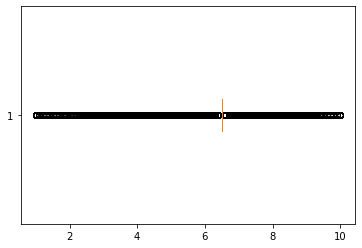

In [43]:
# Box plot
fig, ax =plt.subplots()
ax.boxplot(titles_and_ratings['averagerating'],vert=False)
plt.show()

#### Run Time Analysis

In [45]:
# Having a peak at the metrics

titles_and_ratings['runtime_minutes'].describe()

count    146144.000000
mean         86.363758
std         147.191650
min           1.000000
25%          75.000000
50%          87.000000
75%          95.000000
max       51420.000000
Name: runtime_minutes, dtype: float64

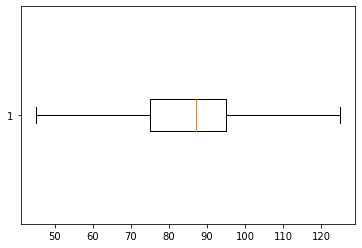

In [46]:
# PLotting boxplot and removing the outliers to get a sense of the scale to be used in plotting the relationship scatter plot
fig, ax =plt.subplots()
red_square = dict(markerfacecolor='r', marker='s')
ax.boxplot(titles_and_ratings['runtime_minutes'],vert=False,showfliers=False)
plt.show()

#### Runtime vs Rating

In [47]:
#Calculating the correlation
runtime=titles_and_ratings['runtime_minutes']
rating=titles_and_ratings['averagerating']
correlation=runtime.corr(rating)
correlation

-0.010537960528471236

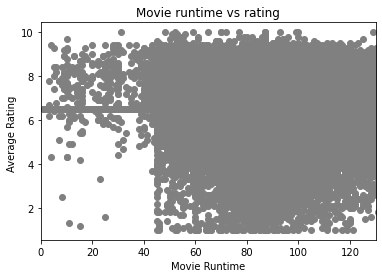

In [48]:
# Basic scatter plot

fig, ax = plt.subplots()

ax.scatter(
    x=runtime ,
    y=rating,
    color="gray"
)
plt.xlim(0,130)
ax.set_xlabel("Movie Runtime")
ax.set_ylabel("Average Rating ")
ax.set_title("Movie runtime vs rating")
plt.show()

### Genre vs Rating Analysis
On inspection, Action is found in most titles with an above average rating. It would therefore be smart to include some sort of action in a movie as it the most popular genre.

In [50]:
#Grouping by genres to find the median, mean and count of the average rating for each title.
titles_and_ratings[['genres','averagerating']].groupby(['genres']).agg(['count', 'median', 'mean'])

averagerating                 
                                   count median      mean
genres                                                   
Action                              2219   6.50  6.172510
Action,Adult,Comedy                    2   4.65  4.650000
Action,Adventure                     114   6.50  5.738596
Action,Adventure,Animation           197   6.60  6.553299
Action,Adventure,Biography            34   6.50  6.847059
...                                  ...    ...       ...
Thriller,Western                       4   7.15  7.150000
Unknown                             5408   6.50  6.499427
War                                  131   6.50  6.368702
War,Western                            1   6.50  6.500000
Western                              142   6.50  5.727465

[1086 rows x 3 columns]

In [52]:
#Creating a new data frame representing genres and their average rating
grouped_data=titles_and_ratings.groupby('genres')['averagerating'].mean()

grouped_df=pd.DataFrame(grouped_data)
grouped_df.reset_index(drop = False, inplace = True)
grouped_df.head()

,genres,averagerating
0,Action,6.172510
1,"Action,Adult,Comedy",4.650000
2,"Action,Adventure",5.738596
3,"Action,Adventure,Animation",6.553299
4,"Action,Adventure,Biography",6.847059


In [53]:
#Finding the highest rating
highest_rating=max(list(grouped_df['averagerating']))
highest_rating

9.0

In [54]:
#Finding genres with the highest rating 
highest_rated_genres=grouped_df.loc[grouped_df['averagerating']== 9]
highest_rated_genres

,genres,averagerating
1024,"Music,Mystery",9.0


In [55]:
#Finding Genres with Above Average Rating as 6
above_average_genres=grouped_df.loc[grouped_df['averagerating']>=6 ]
above_average_genres

,genres,averagerating
0,Action,6.172510
3,"Action,Adventure,Animation",6.553299
4,"Action,Adventure,Biography",6.847059
6,"Action,Adventure,Crime",6.003846
7,"Action,Adventure,Documentary",6.855233
...,...,...
1080,"Thriller,War,Western",6.500000
1081,"Thriller,Western",7.150000
1082,Unknown,6.499427
1083,War,6.368702


In [56]:
# Creating a list of the above average genres that could be recommended to the studio
recommended_genres_list=list(above_average_genres['genres'])
recommended_genres_list

['Action',
 'Action,Adventure,Animation',
 'Action,Adventure,Biography',
 'Action,Adventure,Crime',
 'Action,Adventure,Documentary',
 'Action,Adventure,History',
 'Action,Adventure,Musical',
 'Action,Adventure,Sport',
 'Action,Adventure,Western',
 'Action,Animation',
 'Action,Animation,Comedy',
 'Action,Animation,Crime',
 'Action,Animation,Documentary',
 'Action,Animation,Drama',
 'Action,Animation,Fantasy',
 'Action,Animation,History',
 'Action,Animation,Mystery',
 'Action,Animation,Sci-Fi',
 'Action,Animation,Sport',
 'Action,Animation,Thriller',
 'Action,Animation,War',
 'Action,Biography,Comedy',
 'Action,Biography,Crime',
 'Action,Biography,Documentary',
 'Action,Biography,Drama',
 'Action,Biography,Fantasy',
 'Action,Biography,Thriller',
 'Action,Comedy,Crime',
 'Action,Comedy,Documentary',
 'Action,Comedy,Drama',
 'Action,Comedy,Mystery',
 'Action,Comedy,Sci-Fi',
 'Action,Comedy,Thriller',
 'Action,Comedy,Western',
 'Action,Crime',
 'Action,Crime,Documentary',
 'Action,Crime,Dra

### Analysis of  number of votes vs average rating 

There is a low positive correlation between the number of votes and average rating, meaning the value is to small to ascertain whether the number of votees affects the rating.The scatter plot confirms the same. This also means we could rely on the ratings with a lower number of votes.

#### Number of Votes Analysis

In [57]:
#Having a peak at the metrics
titles_and_ratings['numvotes'].describe().round(3)


count     146144.000
mean        1804.971
std        21605.602
min            5.000
25%           48.000
50%           49.000
75%           51.000
max      1841066.000
Name: numvotes, dtype: float64

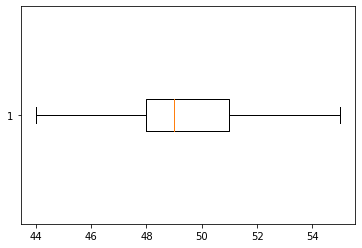

In [58]:
# PLotting boxplot and removing the outliers to get a sense of the scale to be used in plotting the relationship scatter plot
fig, ax =plt.subplots()
red_square = dict(markerfacecolor='r', marker='s')
ax.boxplot(titles_and_ratings['numvotes'],vert=False,showfliers=False)
plt.show()

#### Average Rating Analysis

In [59]:
#Having a peak at the metrics
titles_and_ratings['averagerating'].describe()

count    146144.000000
mean          6.415467
std           1.051874
min           1.000000
25%           6.500000
50%           6.500000
75%           6.500000
max          10.000000
Name: averagerating, dtype: float64

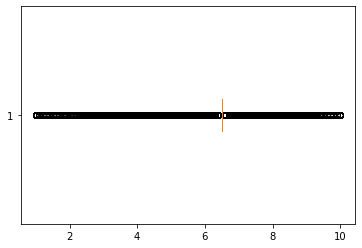

In [60]:
#Box plot
fig, ax =plt.subplots()
red_square = dict(markerfacecolor='r', marker='s')
ax.boxplot(titles_and_ratings['averagerating'],vert=False)
plt.show()

 #### Number of Votes vs Average Rating 

In [61]:
# Calculatng correlation between average rating and number of votes 
votes_number=titles_and_ratings['numvotes']
rating=titles_and_ratings['averagerating']
correlation=votes_number.corr(rating)
correlation

0.037800839922792505

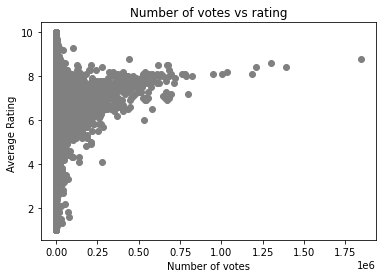

In [62]:
# Basic scatter plot

fig, ax = plt.subplots()


ax.scatter(
    x=votes_number,
    y=rating,
    color="gray"
 
)

ax.set_xlabel("Number of votes")
ax.set_ylabel("Average Rating ")
ax.set_title("Number of votes vs rating")
plt.show()

### Domestic vs Foreign gross Trends
Domestic gross appears to be inconsistent from 2010-2018. Foreign gross however, seems to be more consistent 
and higher as compared to Domestic gross.

##### Domestic gross

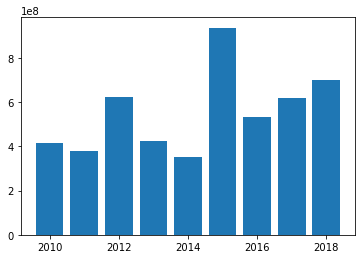

In [63]:
domestic_gross=movie_gross['domestic_gross']
foreign_gross=movie_gross['foreign_gross']
year=movie_gross['year']

fig,ax=plt.subplots()
ax.bar(year,domestic_gross)
plt.show()

#### Foreign gross

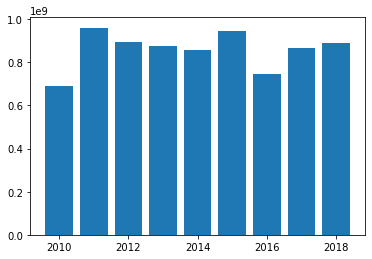

In [64]:

fig,ax=plt.subplots()
ax.bar(year,foreign_gross)
plt.show()


## Conclusions

This analysis leads to three recommendations for the Microsoft Movie Studio Startup:

- **Action should be included in most movie titles.** Most movies with an above average rating of six have Action included in their genre list.This shows that Action is popular amongst most movie audiences
- **Focus on the foreign markets as well.** The foreign market is good for the business as the foreign gross is more consistent and higher as compared to the domestic gross.
- **Movie runtime could be fairly long or take an average runtime.** Runtime does not seem to have much of an impact on the rating.Therefore, runtime could be fairly long or average. The content delivered is what would matter the most.

### Next Steps

Further analyses could yield additional insights to:

- **Predicting the best list of genres to include in a movie foer each market.** Being able to predict this would enable the movie studio to make titles specifically tailored for either foreign or domestic markets